In [61]:
import numpy 
import pandas 
from numpy import set_printoptions
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
filename = 'housing (task4).csv'
names = [' CRIM ', ' ZN ', ' INDUS ', ' CHAS ', ' NOX ', ' RM ', ' AGE ', ' DIS ', ' RAD ', ' TAX ', ' PTRATIO ',
         ' B ', ' LSTAT ', ' MEDV ']
dataset = read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names)
dataset = dataset.dropna()
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [63]:
array = dataset.values
X = array[:,0:13]
Y = array[:,13]

In [64]:
scaler = MinMaxScaler(feature_range=(0,1))
rX = scaler.fit_transform(X)
set_printoptions(precision=3)
print(rX[0:1, :])

[[0.    0.18  0.068 0.    0.315 0.578 0.642 0.269 0.    0.208 0.287 1.
  0.09 ]]


In [65]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(rX, Y,
                                                                test_size=validation_size, random_state=seed)

In [66]:
num_folds = 3
seed = 1
scoring = 'r2'

In [67]:
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.737467 (0.011413)
 LASSO : 0.245332 (0.057829)
 EN : 0.160228 (0.023761)
 KNN : 0.655409 (0.021859)
 CART : 0.730952 (0.061267)
 SVR : 0.527794 (0.038373)


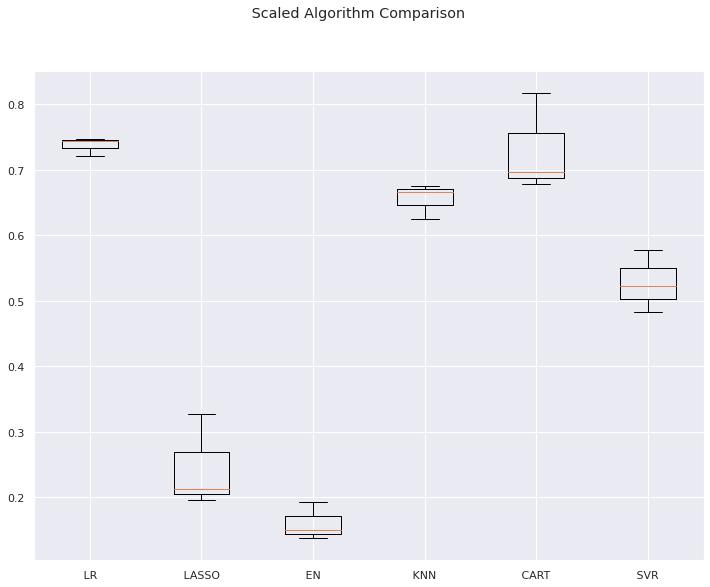

In [68]:
fig = pyplot.figure()
fig.suptitle(' Scaled Algorithm Comparison ')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [69]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(r2_score(Y_validation, predictions))

0.6542504818526064


In [70]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(r2_score(Y_validation, predictions))

0.8615097581088791
